# Coarsening process in Cahn-Hilliard equation

## Free energy

Let us consider a box of size $L_x\times L_y\times L_z$ with periodic boundary condition on each side.
The volume of the system is $V=L_x L_y L_z$.
Let us define $\phi(\mathbf{r},t)$ to be the rescaled density of the fluid at position $\mathbf{r}$ at time $t$.
For example, $\phi(\mathbf{r},t)\gtrsim 0$ represents the liquid phase and $\phi(\mathbf{r},t)\lesssim 0$ represents the vapour phase.
The total amount of fluid in the system $\int_V \phi\,dV$ is conserved since there is no mass creation or annihilation in the system.
We can now define the global density $\phi_0$ to be:
\begin{equation}
\phi_0 = \frac{1}{V} \underbrace{\int_V dV \, \phi(\mathbf{r},t)}_{\text{total amount of fluid}} = \text{constant}.
\end{equation}
The value of $\phi_0$ is fixed from the initial condition.
The total free energy of the system can be written as:
\begin{equation}
F[\phi] = \int_V dV \bigg[ \underbrace{\frac{\alpha}{2}\phi^2 + \frac{\beta}{4}\phi^4}_{f(\phi)} + \frac{\kappa}{2}|\nabla\phi|^2 \bigg],
\end{equation}
$f(\phi)$ is a local free energy density
and $\frac{\kappa}{2}|\nabla\phi|^2$ is a semi-local free energy density term.
$\beta$ and $\kappa$ are positive constants.
$\alpha$ can be positive or negative.
If $\alpha<0$, then the system will favour phase separation into the liquid $\phi\simeq\sqrt{\frac{-\alpha}{\beta}}$ and vapour phase $\phi\simeq-\sqrt{\frac{-\alpha}{\beta}}$.
On the other hand if $\alpha>0$, then the system will remain in a homogenous phase with $\phi=\phi_0$ everywhere.

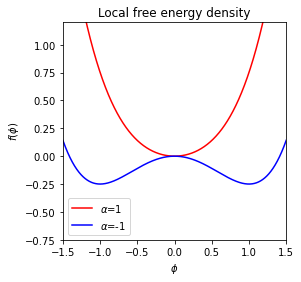

In [2]:
import numpy as np
import matplotlib.pyplot as plt

beta = 1.0
kappa = 1.0
alpha = 1.0

phi = np.arange(-2.0, 2.0, 0.001)
f_phi = 0.5*alpha*phi**2 + 0.25*beta*phi**4

fig, ax = plt.subplots(figsize=(4,4)) 

# set title
ax.set_title('Local free energy density')

# set x label and y label
ax.set_ylabel('$f(\phi)$')
ax.set_xlabel('$\phi$')

# to change x range and y range
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-0.75, 1.2])

# add ticks
ax.tick_params(axis="both")

# plot f(phi) for alpha = 1
ax.plot(phi, f_phi, c='red', label='$\\alpha$=1') 

# plot f(phi) for alpha = -1
alpha = -1.0
f_phi = 0.5*alpha*phi**2 + 0.25*beta*phi**4
ax.plot(phi, f_phi, c='blue', label='$\\alpha$=-1') 

# legend location legend font
ax.legend(loc="lower left")

plt.show()

The equilibrium state is given by the minimum of the total free energy $F[\phi]$, _i.e_,
\begin{equation}
\frac{\delta F}{\delta\phi} = 0,
\end{equation}
subject to the constraint
\begin{equation}
\phi_0 = \frac{1}{V} \int_V dV \, \phi(\mathbf{r},t) = \text{constant}.
\end{equation}
There are two equilibrium states:
1. Homogenous state, where the density is constant everywhere $\phi(\mathbf{r},t)=\phi_0=$ constant.
2. Droplet state, where the system is separated into two domains: $\phi=+\sqrt{\frac{-\alpha}{\beta}}$ and $\phi=-\sqrt{\frac{-\alpha}{\beta}}$

The control parameters are $\alpha$ and $\phi_0$.
Depending on the values of $\alpha$ and $\phi_0$, the equilibrium state of the system can either be the homogenous state or the droplet state.


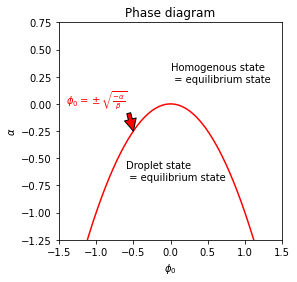

In [3]:
beta = 1.0
kappa = 1.0

phi = np.arange(-2.0, 2.0, 0.001)

fig, ax = plt.subplots(figsize=(4,4)) 

# set title
ax.set_title('Phase diagram')

# set x label and y label
ax.set_ylabel('$\\alpha$')
ax.set_xlabel('$\phi_0$')

# to change x range and y range
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.25, 0.75])

ax.tick_params(axis="both")

alpha = -beta*phi**2
ax.plot(phi, alpha, c='red') 

# add annotation
ax.annotate("Homogenous state \n = equilibrium state", xy=(0.0,0.2))
ax.annotate("Droplet state \n = equilibrium state", xy=(-0.6,-0.7))
ax.annotate("$\phi_0=\pm\sqrt{\\frac{-\\alpha}{\\beta}}$", 
            c='red', 
            xy=(-0.5,-0.25),  # location of the arrow tip
            xytext=(-1.4,0.0),  # location of the text
            arrowprops=dict(facecolor='red'))  # the arrow points from the text to the arrowtip

plt.show()

## Functional derivative

Let us consider some functional $F[\phi(\mathbf{r})]$, which in general, can be written as:
\begin{equation}
F[\phi] = \int_V g(\phi,\partial_\alpha\phi)\,dV.
\end{equation}
In the above equation, $g(\phi,\partial_\alpha\phi)$ is some function of $\phi$ and its derivative $\partial_\alpha\phi$.
Here the index $\alpha=x,y,z$ represents the Cartesian coordinates.
We also use the following notation for partial derivatives $\partial_x=\frac{\partial}{\partial x}$, $\partial_y=\frac{\partial}{\partial y}$, and so on.
In the case of our free energy, $g$ is given by:
\begin{equation}
g(\phi,\partial_\alpha\phi) = \frac{\alpha}{2}\phi^2 + \frac{\beta}{4}\phi^4 + \frac{\kappa}{2}(\partial_\alpha\phi)(\partial_\alpha\phi).
\end{equation}
Here, we have used the repeated index notation, _i.e_ summation over that index is implied so the last term in the above equation is implied to be:
\begin{equation}
(\partial_\alpha\phi)(\partial_\alpha\phi) =
(\partial_x\phi)^2 + (\partial_y\phi)^2 + (\partial_z\phi)^2 = |\nabla\phi|^2
\end{equation}

Now let us consider some density field $\phi(\mathbf{r})$.
Let's suppose that we add some perturbation to the density field such that 
$\phi(\mathbf{r})\rightarrow\phi(\mathbf{r}) + \delta\phi(\mathbf{r})$,
where $\delta\phi$ is a small perturbation.
And we also suppose that $\delta\phi$ vanishes at the boundary (_i.e._ the surface of the box).
We want to calculate the change in the total free energy due to this perturbation:
\begin{align}
\delta F &= F[\phi+\delta\phi] - F[\phi] \\
&= \int_V g(\phi+\delta\phi,\partial_\alpha\phi+\partial_\alpha\delta\phi)\,dV - \int_V g(\phi,\partial_\alpha\phi)\,dV
\end{align}
Next we take Taylor series for the first term to get:
\begin{align}
\delta F 
&= \int_V g(\phi+\delta\phi,\partial_\alpha\phi+\partial_\alpha\delta\phi)\,dV 
\ - \int_V g(\phi,\partial_\alpha\phi)\,dV \\
&= \int_V \left\{ g(\phi,\partial_\alpha\phi) + \frac{\partial g}{\partial\phi}\delta\phi 
\ + \frac{\partial g}{\partial(\partial_\alpha\phi)}\partial_\alpha(\delta\phi) \right\} \,dV 
\ - \int_V g(\phi,\partial_\alpha\phi)\,dV \\
&= \int_V \left\{ \frac{\partial g}{\partial\phi}\delta\phi + \frac{\partial g}{\partial(\partial_\alpha\phi)}\partial_\alpha(\delta\phi) \right\}dV
\end{align}
Using product rule (or integration by parts), we can write:
\begin{equation}
\frac{\partial g}{\partial(\partial_\alpha\phi)}\partial_\alpha(\delta\phi)
= \partial_\alpha\left(\frac{\partial g}{\partial(\partial_\alpha\phi)}\delta\phi\right) - \partial_\alpha\left(\frac{\partial g}{\partial(\partial_\alpha\phi)}\right)\delta\phi
\end{equation}
Thus, $\delta F$ becomes:
\begin{align}
\delta F = \int_V \left\{ \frac{\partial g}{\partial\phi}\delta\phi \right\}dV + \int_V \partial_\alpha\left(\frac{\partial g}{\partial(\partial_\alpha\phi)}\delta\phi\right)dV - \int_V \left\{ \partial_\alpha\left(\frac{\partial g}{\partial(\partial_\alpha\phi)}\right)\delta\phi \right\}dV
\end{align}
For the second term, we can use divergence theorem:
\begin{equation}
\int_V \partial_\alpha F_\alpha\,dV = \oint_S F_\alpha\,dS_\alpha,
\end{equation}
where $S$ is the surface bounding the volume $V$.
So we end up with:
\begin{align}
\delta F &= \int_V \left\{ \frac{\partial g}{\partial\phi}\delta\phi \right\}dV + \underbrace{\oint_S \left(\frac{\partial g}{\partial(\partial_\alpha\phi)}\delta\phi\right)dS_\alpha}_{=0} - \int_V \left\{ \partial_\alpha\left(\frac{\partial g}{\partial(\partial_\alpha\phi)}\right)\delta\phi \right\}dV \\
&= \int_V \bigg\{ \underbrace{\frac{\partial g}{\partial\phi} - \partial_\alpha\left(\frac{\partial g}{\partial(\partial_\alpha\phi)}\right)}_{\delta F/\delta\phi(\mathbf{r})} \bigg\}\delta\phi\,dV 
\end{align}
The surface integral above vanishes since $\delta\phi$ vanishes at the boundary.
The functional derivative of $F$ with respect to $\phi(\mathbf{r})$ is defined to be the terms inside the curly brackets:
\begin{equation}
\frac{\delta F}{\delta\phi(\mathbf{r})} = \frac{\partial g}{\partial\phi} - \partial_\alpha\left(\frac{\partial g}{\partial(\partial_\alpha\phi)}\right).
\end{equation}
The functional derivative is like a generalization of the regular derivative.
When the total free energy is minimum (or maximum), the functional derivative of that free energy must be equal to zero:
\begin{equation}
\frac{\delta F}{\delta\phi} = 0.
\end{equation}


## Dynamics

The chemical potential $\mu(\mathbf{r},t)$ is defined to be the energy cost of adding a particle locally at $\mathbf{r}$. 
Mathematically, it can be written as:
\begin{equation}
\mu = \frac{\delta F}{\delta\phi}.
\end{equation}
Using the formula for functional derivative above, we can calculate:
\begin{equation}
\mu = \frac{\partial g}{\partial\phi} - \partial_\alpha\left(\frac{\partial g}{\partial(\partial_\alpha\phi)}\right) 
= \alpha\phi + \beta\phi^3 - \kappa\underbrace{\partial_\alpha\partial_\alpha\phi}_{\nabla^2\phi}
\end{equation}
Note that:
\begin{equation}
\partial_\alpha\partial_\alpha = \partial_x^2 + \partial_y^2 + \partial_z^2 = \nabla^2 
\end{equation}

Since the total amount of fluid in the system is conserved, the dynamics of $\phi(\mathbf{r},t)$ must follow the continuity equation:
\begin{equation}
\frac{\partial\phi}{\partial t} + \nabla\cdot\mathbf{J} = 0,
\end{equation}
where $\mathbf{J}$ is the current.
To see this, we can integrate the continuity equation over the whole box to get:
\begin{align}
\frac{d}{dt}\int_V\phi\,dV + \int_V \nabla\cdot\mathbf{J}\,dV &= 0 \\
\frac{d}{dt}\int_V\phi\,dV + \underbrace{\oint_S \mathbf{J}\cdot\hat{\mathbf{n}}\,dS}_{=0} &= 0,
\end{align}
where we have used the divergence theorem on the second term.
$S$ is the surface covering the boundary of the box.
Now since we have periodic boundary condition on each side of the box, the second term in the equation above vanishes
so we end up with:
\begin{equation}
\frac{d}{dt}\int_V\phi\,dV  = 0 
\quad\Rightarrow\quad 
\int_V\phi\,dV  = \text{constant},
\end{equation}
which implies the total amount of fluid is conserved.

Finally, the current is given by:
\begin{equation}
\mathbf{J} = -M\nabla\mu,
\end{equation}
_i.e._, particles diffuse from regions with high chemical potential to regions with low chemical potential.
$M>0$ is called the mobility.
Thus the dynamics can also be written as:
\begin{equation}
\frac{\partial\phi}{\partial t} = M\nabla^2\mu.
\end{equation}
Now let us consider the rate of change of the total free energy $F$:
\begin{align}
\frac{dF}{dt} = \frac{d}{dt} \int_V g(\phi,\partial_\alpha\phi)\,dV 
=  \int_V \frac{\partial}{\partial t}g(\phi,\partial_\alpha\phi)\,dV.
\end{align}
Next using chain rule, we get:
\begin{align}
\frac{dF}{dt} &= \int_V \left\{ \frac{\partial g}{\partial\phi}\frac{\partial\phi}{\partial t} + \frac{\partial g}{\partial(\partial_\alpha\phi)}\partial_\alpha\left(\frac{\partial\phi}{\partial t}\right) \right\} dV \\
&= \int_V \bigg\{ \underbrace{\frac{\partial g}{\partial\phi} - \partial_\alpha\left(\frac{\partial g}{\partial(\partial_\alpha\phi)}\right)}_{=\mu} \bigg\}\underbrace{\frac{\partial\phi}{\partial t}}_{=\nabla^2\mu} \,dV,
\end{align}
where we have used integration by parts again and the surface integral term vanishes (similar to previous section).
Finally, we substitute the dynamics to get:
\begin{align}
\frac{dF}{dt} = \int_V \mu\nabla^2\mu\,dV = -\int_V \nabla\mu\cdot\nabla\mu\,dV \le 0,
\end{align}
where we have used the integration by parts again.
Thus we have shown that $\frac{dF}{dt}$ is always negative as long as the dynamics follows $\dot{\phi}=\nabla^2\mu$.
In other words the dynamics $\dot{\phi}=\nabla^2\mu$ will guarantee that the total free energy always decreases with time until the minimum (equilibrium state) is reached.

## Linear stability of the homogenous state

The dynamics for $\phi(\mathbf{r},t)$ can be now written as:
\begin{equation}
\frac{\partial\phi}{\partial t} = \nabla^2\left[\alpha\phi + \beta\phi^3 - \kappa\nabla^2\phi \right]
\end{equation}
Suppose we write the density field as follows:
\begin{equation}
\phi(\mathbf{r},t) = \phi_0 + \delta\phi(\mathbf{r},t), 
\end{equation}
where $\delta\phi(\mathbf{r},t)$ is a small fluctuation around the homogenous state $\phi=\phi_0$.
We are interested in whether the fluctuations will grow or decay as the time $t$ increases.
To do this, we substitute $\phi=\phi_0+\delta\phi$ into the dynamics to get:
\begin{equation}
\frac{\partial\delta\phi}{\partial t} = \nabla^2\left[(\alpha + 3\beta\phi_0^2)\delta\phi - \kappa\nabla^2\delta\phi \right].
\end{equation}
Now we write $\delta\phi(\mathbf{r},t)$ as a Fourier series:
\begin{equation}
\delta\phi(\mathbf{r},t) = \sum_{\mathbf{q}} \delta\tilde\phi_{\mathbf{q}}(t)e^{i\mathbf{q}\cdot\mathbf{r}}.
\end{equation}
$\mathbf{q}=(q_x,q_y,q_z)^T$ is the wavevector and each component of $\mathbf{q}$ is discrete:
\begin{align}
q_x &= 0, \pm\frac{2\pi}{L_x}, \pm\frac{4\pi}{L_x}, \dots \\ 
q_y &= 0, \pm\frac{2\pi}{L_y}, \pm\frac{4\pi}{L_y}, \dots \\ 
q_z &= 0, \pm\frac{2\pi}{L_z}, \pm\frac{4\pi}{L_z}, \dots \\ 
\end{align}
The summation in the Fourier series indicates summing over all discrete values of $\mathbf{q}$'s.
The Fourier series can be thought as decomposing a function $\phi(x)$, which is defined on $x\in[0,L]$, 
into standing waves $1,e^{\pm i\frac{2\pi}{L}x},e^{\pm i\frac{4\pi}{L}x},\dots$, with $\tilde{\phi}_q$ as the amplitude for each standing wave.
Substituting the Fourier series into the dynamics, a set of first order ODE:
\begin{equation}
\frac{d\delta\tilde\phi_\mathbf{q}}{dt} = -\left[(\alpha + 3\beta\phi_0^2)q^2  + \kappa q^4 \right] \delta\tilde\phi_{\mathbf{q}},\quad\text{for each }\mathbf{q}.
\end{equation}
The solution is:
\begin{equation}
\delta\tilde\phi_{\mathbf{q}}(t) = A_\mathbf{q} e^{r(q)t},
\end{equation}
where
\begin{equation}
r(q) = (-\alpha - 3\beta\phi_0^2)q^2 - \kappa q^4
\end{equation}
is the growth rate constant (here $q=|\mathbf{q}|$).
If $r(q)>0$ then the fluctuation $\delta\tilde\phi_{\mathbf{q}}$ will grow exponentially.
If $r(q)<0$ then the fluctuation $\delta\tilde\phi_{\mathbf{q}}$ will decay exponentially to zero.
Now let's consider case by case.

#### Case I: $\alpha>0$

In this case, the coefficients of $q^2$ and $q^4$ in $r(q)$ are always negative.
\begin{equation}
r(q) = \underbrace{(-\alpha - 3\beta\phi_0^2)}_{<0}q^2 \underbrace{- \kappa}_{<0} q^4.
\end{equation}
Therefore the growth rate is always negative
So the fluctuations decay to zero exponentially for all wavevector $\mathbf{q}$.

#### Case IIa: $\alpha>0$ and $-\sqrt{\frac{-\alpha}{3\beta}}<\phi_0<\sqrt{\frac{-\alpha}{3\beta}}$

In this case, the coefficient of $q^2$ is positive whereas the coefficient of $q^4$ is negative.
\begin{equation}
r(q) = \underbrace{(-\alpha - 3\beta\phi_0^2)}_{>0} q^2 \underbrace{-\kappa}_{<0} q^4.
\end{equation}
We can plot the growth rate $r(q)$ as a function of $q=|\mathbf{q}|$.
The growth rate is positive for some range of $q$. 
This indicates the fluctuations will grow exponentially with time for some values of $\mathbf{q}$.
We can also define a characteristic wavevector $q^*$ such that the growth rate is maximum.
This correponds to the initial growth lengthscale $\lambda^*=\frac{2\pi}{q^*}$.

#### Case IIb: $\alpha>0$ and $|\phi_0|>\sqrt{\frac{-\alpha}{3\beta}}$

In this case, both coefficients of $q^2$ and $q^4$ are negative in the growth rate.
Thus all fluctuations decay to zero for all $\mathbf{q}$, similar to case I.
However note that from the previous section, if $\sqrt{\frac{-\alpha}{3\beta}}<\phi_0<\sqrt{\frac{-\alpha}{\beta}}$ and
$-\sqrt{\frac{-\alpha}{\beta}}<\phi_0<\sqrt{\frac{-\alpha}{3\beta}}$ then the actual equilibrium state (lowest energy state) of the system is a droplet state.
However, if we initialize the system from a homogenous state $\phi(\mathbf{r},t=0)=\phi_0+\text{ small noise}$, the system will actually remain in the homogenous state, even though the homogenous state is not the lowest energy state.
We call the homogenous state to be a metastable state in this regime.

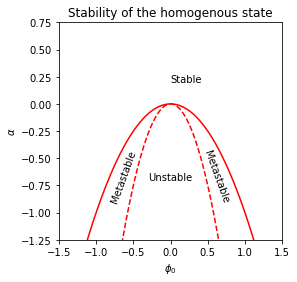

In [4]:
beta = 1.0
kappa = 1.0

phi = np.arange(-2.0, 2.0, 0.001)

fig, ax = plt.subplots(figsize=(4,4)) 

# set title
ax.set_title('Stability of the homogenous state')

# set x label and y label
ax.set_ylabel('$\\alpha$')
ax.set_xlabel('$\phi_0$')

# set x range and y range
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.25, 0.75])

ax.tick_params(axis="both")

alpha1 = -beta*phi**2
alpha2 = -3.0*beta*phi**2
ax.plot(phi, alpha1, c='red') 
ax.plot(phi, alpha2, '--', c='red') 

# add annotation
ax.annotate("Stable", xy=(0.0,0.2))
ax.annotate("Unstable", xy=(-0.3,-0.7))
ax.annotate("Metastable", xy=(-0.82,-0.9), rotation=70)
ax.annotate("Metastable", xy=(0.42,-0.9), rotation=-70)

plt.show()

## Numerical simulation

Let us consider a two-dimensional system. In computer simulation the space $\mathbf{r}$ is discretized into lattice with step size $\Delta x$ along the $x$-axis and $\Delta y$ along the $y$-axis.
(Ideally $\Delta x$ and $\Delta y$ have to be small.)
The coordinates $x$ and $y$ then become:
\begin{align}
x &\rightarrow i\Delta x, \quad \text{where } i = 0,1,2,\dots,N_x-1 \\
y &\rightarrow j\Delta y, \quad \text{where } j = 0,1,2,\dots,N_y-1.
\end{align}
$N_x\in\mathbb{N}$ and $N_y\in\mathbb{N}$ are the number of lattice points along $x$ and along $y$ respectively.
The system size is now $L_x\times L_y$, where $L_x = N_x \Delta x$ and $L_y = N_y \Delta y$. 
Similarly the time $t$ is also discretized into:
\begin{equation}
t \rightarrow n\Delta t, \quad \text{where } n = 0,1,2,\dots,N_t-1
\end{equation}
where $N_t\Delta t$ is total length of time that we run the simulation for.
The density field then becomes:
\begin{equation}
\phi(\mathbf{r},t) \rightarrow \phi^n_{ij}.
\end{equation}

Now we want to solve:
\begin{equation}
\frac{\partial\phi}{\partial t} = \nabla^2\mu, \quad \text{where} \quad 
\mu = \alpha\phi + \beta\phi^3 - \kappa\nabla^2\phi.
\end{equation}
First we can write the time derivative as:
\begin{equation}
\frac{\partial\phi}{\partial t} \simeq \frac{\phi_{ij}^{n+1} - \phi_{ij}^n}{\Delta t} + \mathcal{O}(\Delta t)
\end{equation}
So the dynamics becomes:
\begin{equation}
\phi_{ij}^{n+1} = \phi_{ij}^n + \Delta t \nabla^2 \mu_{ij}^n.
\end{equation}
So for a given initial condition $\phi_{ij}^0$ we can find $\phi$ for subsequent timesteps: $\phi_{ij}^1, \phi_{ij}^2, \dots$. 
Next we need to calculate the spatial derivatives of $\phi$ and $\mu$ in the lattice, _i.e._:
\begin{align}
\frac{\partial\phi}{\partial x} &\simeq \frac{\phi_{i+1,j} - \phi_{i-1,j}}{2\Delta x} + \mathcal{O}(\Delta x^2) \\
\frac{\partial\phi}{\partial y} &\simeq \frac{\phi_{i,j+1} - \phi_{i,j-1}}{2\Delta y} + \mathcal{O}(\Delta y^2)\\
\frac{\partial^2\phi}{\partial x^2} &\simeq \frac{\phi_{i+1,j} - 2\phi_{ij} + \phi_{i-1,j}}{\Delta x^2} + \mathcal{O}(\Delta x) \\
\frac{\partial^2\phi}{\partial y^2} &\simeq \frac{\phi_{i,j+1} - 2\phi_{ij} + \phi_{i,j-1}}{\Delta y^2} + \mathcal{O}(\Delta y) \\
\end{align}
The Laplacian is then given by:
\begin{align}
\nabla^2\phi = \frac{\partial^2\phi}{\partial x^2} + \frac{\partial^2\phi}{\partial y^2} 
= \frac{\phi_{i+1,j} - 2\phi_{ij} + \phi_{i-1,j}}{\Delta x^2} +
  \frac{\phi_{i,j+1} - 2\phi_{ij} + \phi_{i,j-1}}{\Delta y^2} + \mathcal{O}(\Delta x) + \mathcal{O}(\Delta y).
\end{align}
In Python $\phi_{ij}$ is represented as a matrix:
\begin{align}
\phi &=
\begin{pmatrix}
\phi_{00} & \phi_{01} & \ldots & \phi_{0,N_y-1} \\
\phi_{10} & \phi_{11} &  & \phi_{1,N_y-1} \\
\vdots &  & \ddots & \vdots \\
\phi_{N_x-1,0} & \phi_{N_x-1,1} & \ldots & \phi_{N_x-1,N_y-1} \\
\end{pmatrix} \downarrow x\text{-direction} \\
&\quad\quad\quad\quad\quad\longrightarrow y\text{-direction}
\end{align}
Note that the $x$- and $y$-axis are transposed.


In [5]:
# everything here are global variables
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

dx = 1.0  # normally dx = dy
dt = 0.01 

Nx = 64  # normally the total number of lattice = 2^(some integer)
Ny = 64  # this is required for Fourier transform later
Nt = 1000000
T = int(Nt*dt)  # total length of time 

alpha = -1.0
beta = 1.0
kappa = 1.0
phi0 = 0.0

# array of cartesian coordinates (needed for plotting)
x = np.arange(0, Nx)*dx
y = np.arange(0, Ny)*dx
y, x = np.meshgrid(y, x) 

# create a phi-matrix of size Nx by Ny (similarly for mu-matrix)
phi = np.zeros((Nx, Ny))  # phi at instantaneous time
phi_t = np.zeros((Nx, Ny, T))  # phi as a function of time t
mu = np.zeros((Nx, Ny))

In [6]:
# method to calculate the laplacian
def laplacian(phi):
    # axis=0 --> roll along x-direction
    # axis=1 --> roll along y-direction
    laplacianphi = (np.roll(phi,+1,axis=0) - 2.0*phi + np.roll(phi,-1,axis=0))/(dx*dx) \
                 + (np.roll(phi,+1,axis=1) - 2.0*phi + np.roll(phi,-1,axis=1))/(dx*dx)

    return laplacianphi

# create animation
def animate(phi_t):
    # initialize figure and movie objects
    fig, ax = plt.subplots(figsize=(4,4)) 

    # set label
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")

    # set x range and y range
    ax.set_xlim([0, Nx*dx])
    ax.set_ylim([0, Ny*dx])

    # set tick interval
    ax.tick_params(axis="both")
    plt.xticks(np.arange(0, Nx, 10)*dx)
    plt.yticks(np.arange(0, Ny, 10)*dx)

    # set aspect ratio
    ax.set_aspect('equal')

    # create colormap of phi
    colormap = ax.pcolormesh(x, y, phi_t[:,:,0], shading='auto', vmin=-1.2, vmax=1.2)
    plt.colorbar(colormap)

    def animate(t):
        # set title
        ax.set_title(f't = {t}')
        colormap.set_array(phi_t[:,:,t].flatten())  # update data

    # interval = time between frames in miliseconds
    ani = animation.FuncAnimation(fig, animate, interval=10, frames=range(0,T,10))  
    ani.save("movie.avi")

# plot phi at 4 different times
def plot(phi_t, t1, t2, t3, t4):
    # initialize figure and movie objects
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(8,2)) 

    ax1.set_title(f't = {t1}')
    ax1.set_aspect('equal')
    colormap = ax1.pcolormesh(x, y, phi_t[:,:,t1], \
                              shading='auto', vmin=-1.2, vmax=1.2)

    ax2.set_title(f't = {t2}')
    ax2.set_aspect('equal')
    colormap = ax2.pcolormesh(x, y, phi_t[:,:,t2], \
                              shading='auto', vmin=-1.2, vmax=1.2)

    ax3.set_title(f't = {t3}')
    ax3.set_aspect('equal')
    colormap = ax3.pcolormesh(x, y, phi_t[:,:,t3], \
                              shading='auto', vmin=-1.2, vmax=1.2)

    ax4.set_title(f't = {t4}')
    ax4.set_aspect('equal')
    colormap = ax4.pcolormesh(x, y, phi_t[:,:,t4], \
                              shading='auto', vmin=-1.2, vmax=1.2)

    plt.show()
    
# apply wall boundary condition
def apply_walls(phi):
    phi[:, 0] = phi[:, 2]
    phi[:, 1] = phi[:, 2]
    phi[:, Ny-1] = phi[:, Ny-3]
    phi[:, Ny-2] = phi[:, Ny-3]
    
    return phi

# update phi
def update(phi):
    # calculate mu
    mu = alpha*phi + beta*phi*phi*phi - kappa*laplacian(phi)

    # update phi
    phi = phi + dt*laplacian(mu)
    
    return phi

# method to run the simulation from a uniform phi + a little bit of noise
def run():
    # initialize the system with uniform state + a little bit of noise
    phi = np.ones((Nx, Ny))*phi0 + np.random.normal(0.0, 0.001, (Nx, Ny))
    
    # update the \phi_{ij}^n for all n
    for n in range(0, Nt, 1):
            
        # save current phi
        if (n % int(1/dt) == 0):
            phi_t[:,:,int(n*dt)] = phi
            
        phi = update(phi)

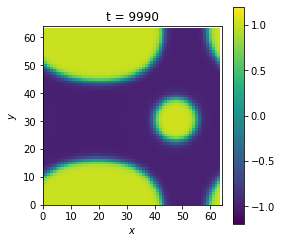

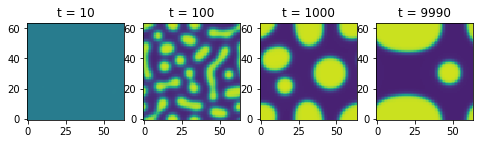

In [7]:
# run simulation for phi0 = -0.2
phi0 = -0.2
run()
#animate(phi_t)
plot(phi_t, 10, 100, 1000, 9990)

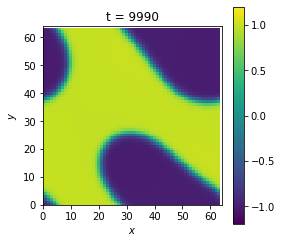

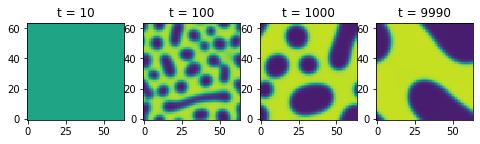

In [8]:
# run simulation for phi0 = 0.2
phi0 = 0.2
run()
#animate(phi_t)
plot(phi_t, 10, 100, 1000, 9990)

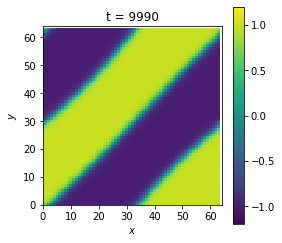

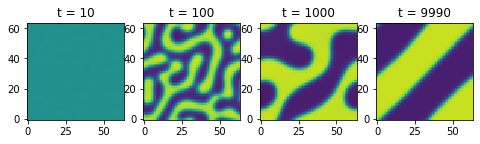

In [9]:
# run simulation for phi0 = 0.0
phi0 = 0.0
run()
#animate(phi_t)
plot(phi_t, 10, 100, 1000, 9990)